# Group-11-E1Y4

## Import the relevant libraries

In [77]:
# Import datasets library
from sklearn.datasets import load_iris
# Import decision library
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Import necessary library

In [78]:
# Load Dataset from sklearn
iris = load_iris()

## Load Dataset from collection

In [79]:
# load feature name
feature_names = iris.feature_names
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Data Preview

In [80]:
# Load target class
target_names = iris.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


## Records in dataset

In [81]:
X, y = iris.data, iris.target

# Get the unique classes and their counts
unique, counts = np.unique(y, return_counts=True)

# Create a dictionary with class names as keys and counts as values
class_counts = dict(zip(unique, counts))

print("Class distribution:", class_counts)
total_records = sum(class_counts.values())
print("Total records in the dataset:", total_records)

Class distribution: {np.int64(0): np.int64(50), np.int64(1): np.int64(50), np.int64(2): np.int64(50)}
Total records in the dataset: 150


In [82]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Root model

Root Node Feature Index: 2
Root Node Threshold: 2.449999988079071


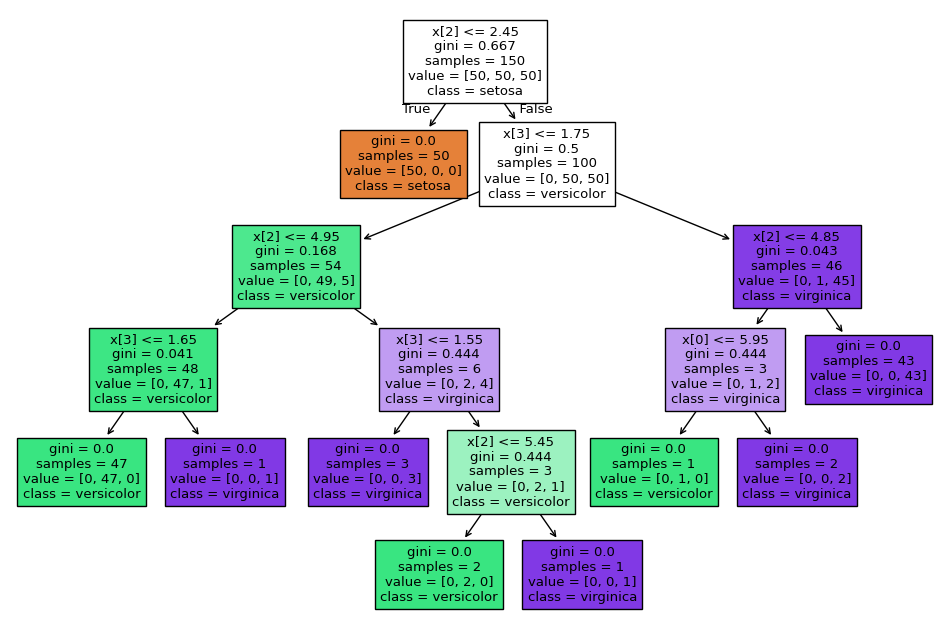

In [86]:

clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X, y)

# Function to display the root node feature and threshold
def get_root_node(clf):
    # Extract the feature index and threshold for the root node
    root_node_feature_index = clf.tree_.feature[0]
    root_node_threshold = clf.tree_.threshold[0]
    
    print(f"Root Node Feature Index: {root_node_feature_index}")
    print(f"Root Node Threshold: {root_node_threshold}")
    
    return root_node_feature_index, root_node_threshold

root_node_feature, root_node_threshold = get_root_node(clf)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=["x[0]", "x[1]", "x[2]", "x[3]"], class_names=iris.target_names, filled=True)
plt.show()

## Plot decision tree model

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

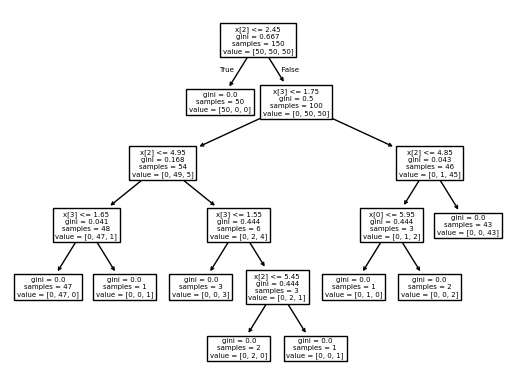

In [84]:
tree.plot_tree(clf)

In [85]:
#Predict the response for test dataset
y_pred = clf.predict([[6.7, 3.3, 5.7, 2.1]])
print("The predicted class is: " + iris.target_names[y_pred[0]])

The predicted class is: virginica


# Questions
## 1/ What is the name of this dataset?
## 2/ How many features are there?
## 3/ What are the feature names?
## 4/ How many target classes are there? what are they?
## 5/ How many records are there in the dataset?
## 6/ What is the root node?
## 7/ What class will the model "tree" predict?

# Answer
## 1/ What is the name of this dataset?
### -> Iris dataset – A dataset of flower species used for classification.

## 2/ How many features are there?
### -> 4 features – Sepal length, Sepal width, Petal length, Petal width.

## 3/ What are the feature names?
### -> 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'

## 4/ How many target classes are there? What are they?
### -> 3 classes – Setosa, Versicolor, Virginica.

## 5/ How many records are there in the dataset?
### -> 150 records – 50 records per class.

## 6/ What is the root node?
### ->  x[2](Petal length) (cm) ≤ 2.45 – The feature that splits the data at the root.

## 7/ What class will the model "tree" predict?
### -> Class will be:
### - If x[2](Petal length) is ≤ 2.45 cm, the prediction is Setosa.
### - If x[2](Petal length) is > 2.45 cm, the tree further evaluates petal width to predict either Versicolor (petal length > 2.45 and petal width <= 1.75) or Virginica(petal length > 2.45 and petal width > 1.75).
### -> So our final class answer of the model that will be predicted is Setosa (x[2](Petal length) (cm) ≤ 2.45).


### Note: There are slight code changes added to the original source code, as we had to verify which one was the most correct answer.
